In [296]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
stopWords = set(stopwords.words('english'))

In [297]:
df1 = pd.read_csv('../resources/cpj_salary_location_cleaned.csv')

In [298]:
df1=df1[["Job Title","Location","Mean_Salary","Description","Category","Skills","Tools","state"]]
df1=df1.dropna()
df1=df1.drop_duplicates()
df1=df1[df1["Mean_Salary"]!=0]
df1

,Job Title,Location,Mean_Salary,Description,Category,Skills,Tools,state
2,Junior Data Analyst,"Louisville, KY 40223",35750,Basic Function: Develop and process targeted m...,Data Analyst,Data Analysis,"SQL, R, Excel",KY
4,Marketing Data Analyst,"Sarasota, FL 34211",42500,Mercedes Scientific is a national leader in th...,Data Analyst,,R,FL
7,Power BI/Data Analyst,"Dallas-Fort Worth, TX•Temporarily Remote",95000,About our TeamThe Ethos Group IT team consists...,Data Analyst,Statistics,"SQL, R, Excel, Power BI, Tableau",TX
9,Online Data Analyst - USA,"Annapolis, MD•Remote",14500,Company Info: We help companies test and impro...,Data Analyst,,"R, AI, Machine Learning",MD
10,Online Data Analyst - USA,"New Orleans, LA•Remote",14500,Company Info: We help companies test and impro...,Data Analyst,,"R, AI, Machine Learning",LA
...,...,...,...,...,...,...,...,...
15646,Full Stack Developer (REMOTE),"Tampa, FL 33601•Remote",47500,Join us as we pursue our mission to remove the...,Business Intelligence Developer,,"Python, Spark, JavaScript, R, Cloud, HTML, CSS...",FL
15668,Data Analyst II Database developer II Entry le...,"Poway, CA•Temporarily Remote",65000,SQL Developer (Training)Responsibilities· Help...,Business Intelligence Developer,ETL,"SQL, R, Power BI, Tableau",CA
15671,Workday Business Intelligence Developer,"Las Vegas, NV 89119 (Paradise area)",80000,Workday Business Intelligence Developer\nThank...,Business Intelligence Developer,,"R, Cloud, Excel, Java",NV
15689,Data Developer,"Research Triangle Park, NC 27709",52011,TITLE: IT Data Analytics/Data Developer 1\nDut...,Business Intelligence Developer,,"SQL, R, Power BI, Tableau, Scala",NC


In [299]:
# Classifying job titles into each category
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'data science related jobs'

In [300]:
df1['Job Title'] = df1['Job Title'].apply(title_simplifier)

In [301]:
# Python
df1['Python'] = df1['Tools'].apply(lambda x: 1 if 'python' in x.lower() else 0)

# R studio 
df1['R'] = df1['Tools'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

# SQL 
df1['SQL'] = df1['Tools'].apply(lambda x: 1 if 'sql' in x.lower() else 0)

# AWS 
df1['AWS'] = df1['Tools'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

# Excel
df1['Excel'] = df1['Tools'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

# Google Cloud
df1['GCP'] = df1['Tools'].apply(lambda x: 1 if 'google cloud' in x.lower() or 'gcp' in x.lower() else 0)

# Microsoft Azure
df1['Azure'] = df1['Tools'].apply(lambda x: 1 if 'microsoft azure' in x.lower() or 'azure' in x.lower() else 0)

# Spark
df1['Spark'] = df1['Tools'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

# Tableau
df1['Tableau'] = df1['Tools'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

# Keras
df1['Keras'] = df1['Tools'].apply(lambda x: 1 if 'keras' in x.lower() else 0)

#NoSQL
df1['NoSQL'] = df1['Tools'].apply(lambda x: 1 if 'nosql' in x.lower() else 0)

#Machine Learning
df1['Machine_Learning'] = df1['Tools'].apply(lambda x: 1 if 'machine learning' in x.lower() else 0)

#Hadoop
df1['Hadoop'] = df1['Tools'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)

df1['AI'] = df1['Tools'].apply(lambda x: 1 if 'ai' in x.lower() else 0)

df1['Power_BI'] = df1['Tools'].apply(lambda x: 1 if 'power bi' in x.lower() else 0)


In [302]:
df1=df1.drop(["Skills","Tools"],axis=1)

In [303]:
# Classifying job levels into each category
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'vp' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower()or 'experienced' in title.lower() or 'iii' in title.lower() or 'research' in title.lower() or 'manager' in title.lower():
        return 'Senior'
    elif 'intermediate' in title.lower() or 'staff' in title.lower() or 'ii' in title.lower():
        return 'Mid'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'intern' in title.lower() or 'student' in title.lower()or 'associate' in title.lower():
        return 'Junior'
    else:
        return 'Not Specified'

Text(0.5, 1.0, 'Salary Distribution')

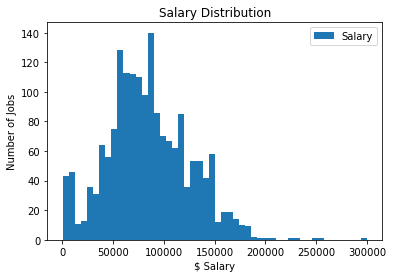

In [304]:
import matplotlib.pyplot as plt
x = list(df1.Mean_Salary)

names = ['Salary']
         
plt.hist([x], bins = 50,
         label=names)

plt.legend()
plt.xlabel('$ Salary')
plt.ylabel('Number of Jobs')
plt.title('Salary Distribution')

In [305]:
# Remove outliers
# df1 = df1[50000 <= df1['Mean_Salary']]
# df1 = df1[df1['Mean_Salary'] < 200000]

In [306]:
df1['Seniority'] = df1['Job Title'].apply(seniority)
# Categorize salary
# def salary_category(salary):
#     if salary<5000:
#         return 0
#     if 50000 <= salary < 75000:
#         return 1
#     if 75000 <= salary < 100000:
#         return 2
#     if 100000 <= salary < 125000:
#         return 3
#     if 125000 <= salary < 150000:
#         return 4
#     if 150000 <= salary < 175000:
#         return 5
#     if 175000 <= salary < 200000:
#         return 6
#     else:
#         return 7
# Categorize salary
def salary_category(salary):

    if salary < 120000:
        return 1
    if 120000<=salary < 170000:
        return 2
    
    if 150000<= salary < 200000:
        return 3
    if salary >= 200000:
        return 4

target = df1['Mean_Salary'].apply(salary_category)
len(target)

1781

In [307]:
df1=df1.drop("Location",axis=1)


In [308]:
df1['Description'] = df1['Description'].apply(lambda x: ' '.join(x.split()))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r'[^\w\s]','', x.lower()))
df1['Description'] = df1['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopWords]))   

In [309]:
from sklearn.model_selection import GridSearchCV
model =  RandomForestClassifier()
param_grid = {'max_depth': [3, 5, 10,15],
         'min_samples_split': [2, 5, 10,15]}
grid_search = GridSearchCV(model, param_grid=param_grid)

In [310]:
df1=df1.drop(["Description","Mean_Salary"],axis=1)

In [311]:
df1.columns

Index(['Job Title', 'Category', 'state', 'Python', 'R', 'SQL', 'AWS', 'Excel',
       'GCP', 'Azure', 'Spark', 'Tableau', 'Keras', 'NoSQL',
       'Machine_Learning', 'Hadoop', 'AI', 'Power_BI', 'Seniority'],
      dtype='object')

In [312]:
df2=pd.get_dummies(df1)

X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2, random_state=42)
X_train.head(2)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]})

In [313]:
preds=grid_search.predict(X_test)

In [314]:
def evaluate(preds, y_test, variation):
    counter = 0
    for i in range(len(preds)):
        if y_test[i]-variation <= preds[i] <= y_test[i]+variation:
            counter += 1
        else: 
            counter += 0
    accuracy = counter / len(preds) 
    return accuracy
        
evaluate(list(preds), list(y_test), 0)

0.8235294117647058

In [315]:
print(X_test.columns.tolist())

['Python', 'R', 'SQL', 'AWS', 'Excel', 'GCP', 'Azure', 'Spark', 'Tableau', 'Keras', 'NoSQL', 'Machine_Learning', 'Hadoop', 'AI', 'Power_BI', 'Job Title_data analyst', 'Job Title_data engineer', 'Job Title_data science related jobs', 'Job Title_data scientist', 'Job Title_director', 'Job Title_machine learning engineer', 'Job Title_manager', 'Category_Big Data Software Engineer', 'Category_Business Intelligence Analyst', 'Category_Business Intelligence Developer', 'Category_Business Systems Analyst', 'Category_Data Analyst', 'Category_Data Architect', 'Category_Data Engineer', 'Category_Data Modeler', 'Category_Data Scientist', 'Category_Data Storyteller', 'Category_Data Warehouse Manager', 'Category_Database Administrator', 'Category_Database Manager', 'Category_IT Systems Analyst', 'Category_Logistics Analyst', 'Category_Machine Learning Engineer', 'Category_Machine Learning Scientist', 'Category_Marketing Analyst', 'Category_Quantitative Analyst', 'Category_Statistician', 'state_ AK'

In [316]:
import pickle
with open('salary_predict_model1.pkl', 'wb') as file:
    pickle.dump(grid_search, file)